<a href="https://colab.research.google.com/github/RussoT99/ProyectoDS_ParteI/blob/main/ProyectoDS_Parte_I__Russo_Tom%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de calidad en vinos

In [2]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import  numpy as np

In [3]:
file_path = 'https://raw.githubusercontent.com/RussoT99/ProyectoDS_ParteI/main/winequality-red.csv'

df = pd.read_csv(file_path)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Descripción de las variables

**Datos**

*  **fixed acidity:** La cantidad de ácidos no volátiles en el vino. Se mide en gramos por litro (g/L).

*  **volatile acidity:** Se refiere a la cantidad de ácidos volátiles en el vino. Un nivel alto puede indicar problemas en la fermentación. Se mide en gramos por litro (g/L).

*  **citric acid:**  Representa la cantidad de ácido cítrico. Se mide en gramos por litro (g/L).

*  **residual sugar:** Es la cantidad de azúcar que queda en el vino después de la fermentación. Se mide en gramos por litro (g/L).

*  **chlorides:** La cantidad de cloruro en el vino. Se mide en gramos por litro (g/L).

*  **free sulfur dioxide:** El dióxido de azufre libre, que actúa como conservante. Se mide en miligramos por litro (mg/L).

*  **total sulfur dioxide:** La suma de todo el dióxido de azufre presente en el vino, tanto en forma libre como combinada. Se mide en miligramos por litro (mg/L).

*  **density:** La densidad del vino, que puede estar influenciada por el contenido de alcohol y azúcar. Se expresa en g/cm³.

*  **pH:** Mide la acidez o alcalinidad del vino en una escala de 0 a 14. Siendo 0 muy acido y 14 muy básico o alcalino.

*  **sulphates:**  La cantidad de sulfatos en el vino. Se mide en gramos por litro (g/L).

*  **alcohol:** El porcentaje de alcohol en el vino. Es la graduación alcoholica de la bebida.

*  **quality:**  La calificación de calidad del vino, usualmente en una escala de 0 a 10, basada en evaluaciones sensoriales.





In [ ]:
df.shape

(1599, 12)

In [ ]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  TSD_z                 1599 non-null   float64
 13  TSD_outliers          1599 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 175.0 KB


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# Estadística Descriptiva

In [4]:
df.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.3,0.5,0.3,2.5,0.1,15.9,46.5,1.0,3.3,0.7,10.4,5.6
std,1.7,0.2,0.2,1.4,0.0,10.5,32.9,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,22.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.3,2.2,0.1,14.0,38.0,1.0,3.3,0.6,10.2,6.0
75%,9.2,0.6,0.4,2.6,0.1,21.0,62.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,72.0,289.0,1.0,4.0,2.0,14.9,8.0


In [ ]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique())/(df.shape[0])*(100)})
cardinalidad

,Cantidad,Porcentaje
fixed acidity,96,6.003752
volatile acidity,143,8.943089
citric acid,80,5.003127
residual sugar,91,5.691057
chlorides,153,9.568480
free sulfur dioxide,60,3.752345
total sulfur dioxide,144,9.005629
density,436,27.267042
pH,89,5.565979
sulphates,96,6.003752


In [ ]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
# variable objetivo pH --> float


# Calculamos el z-score
df['pH_z'] = (df['pH'] - df['pH'].mean())/df['pH'].std()
# Creamos una variable para marcar los outliers
df['pH_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['pH_z']>3)|(df['pH_z']<-3) , 'pH_outliers'] = 1
# Veamos los resultados
df[['pH', 'pH_z','pH_outliers']]

,pH,pH_z,pH_outliers
0,3.51,1.288240,0
1,3.20,-0.719708,0
2,3.26,-0.331073,0
3,3.16,-0.978798,0
4,3.51,1.288240,0
...,...,...,...
1594,3.45,0.899605,0
1595,3.52,1.353012,0
1596,3.42,0.705287,0
1597,3.57,1.676875,0


In [ ]:
# Veamos los casos marcados
df['pH_outliers'].value_counts()

,count
pH_outliers,
0,1591
1,8


In [ ]:
df['pH'][df['pH_outliers']==1]

,pH
45,3.90
95,3.85
151,2.74
695,3.90
1111,3.78
1300,3.78
1316,4.01
1321,4.01


# Visualizaciones y Gráficos

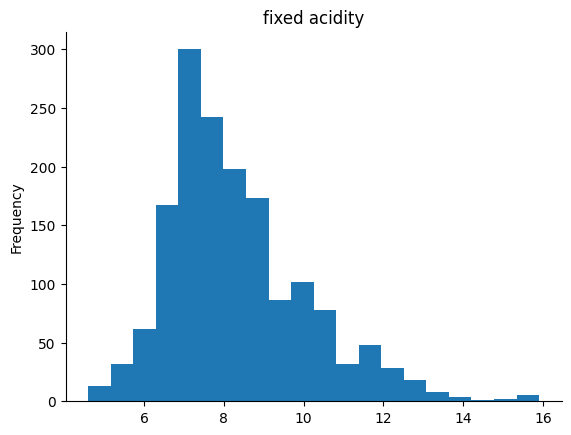

In [ ]:
df['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

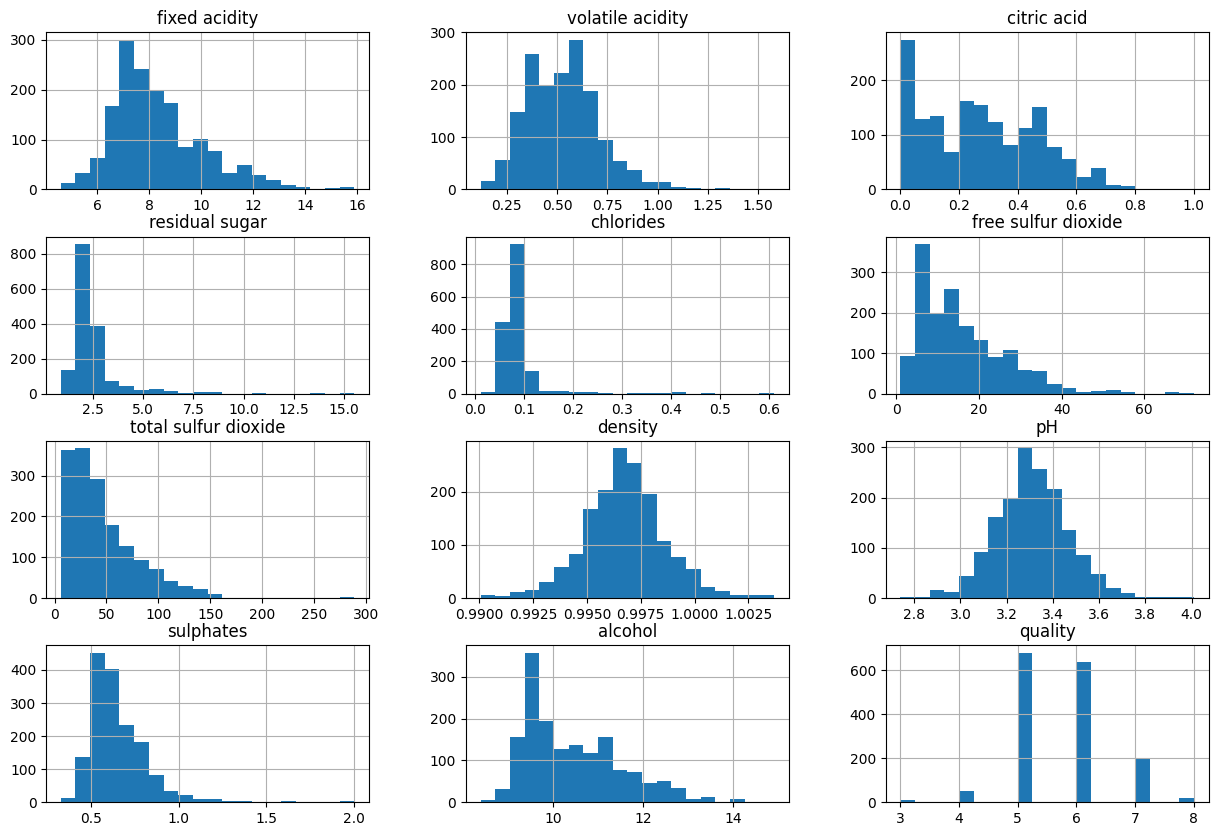

In [ ]:
# Histogramas para cada variable
df.hist(bins=20, figsize=(15, 10))
plt.show()

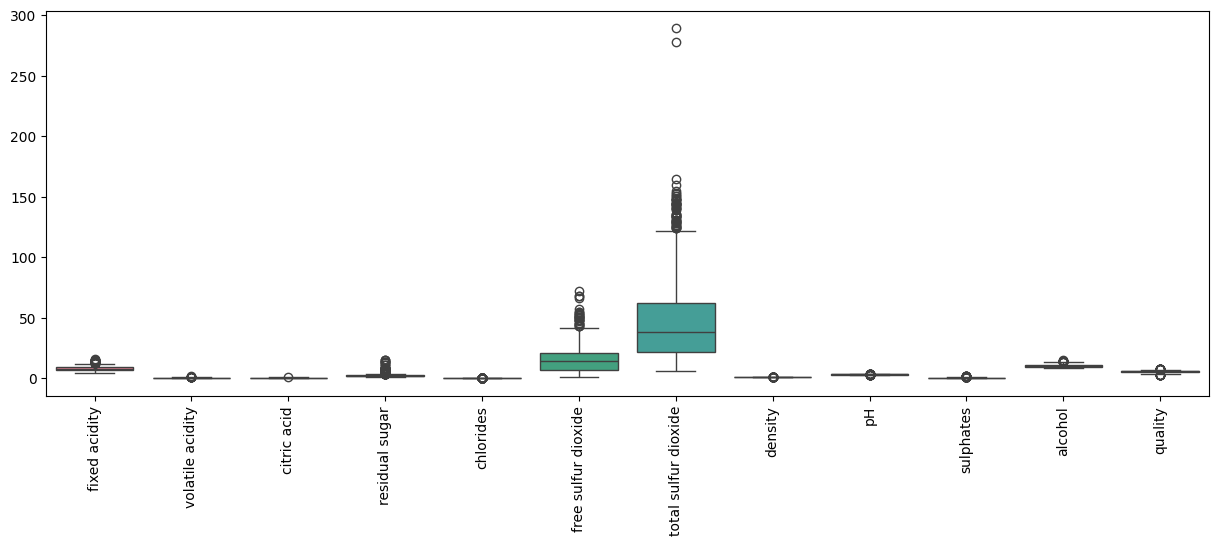

In [ ]:
# Boxplots para detectar outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


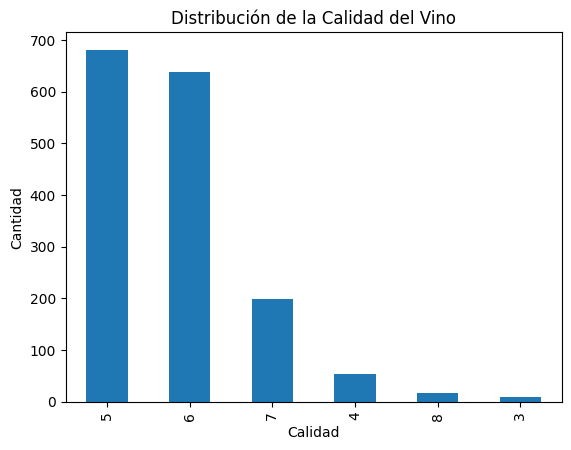

In [ ]:
# Análisis de la variable objetivo (calidad)
df['quality'].value_counts().plot(kind='bar')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.title('Distribución de la Calidad del Vino')
plt.show()

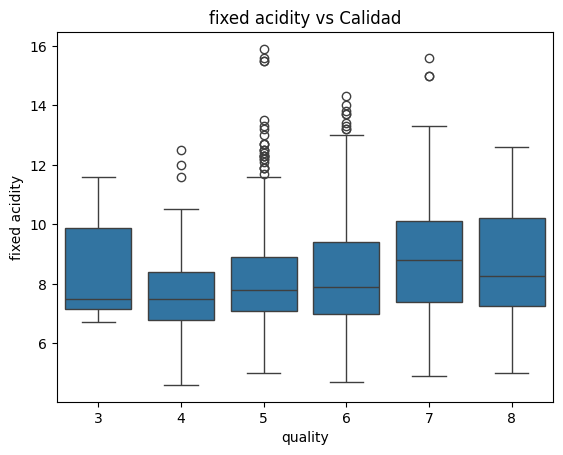

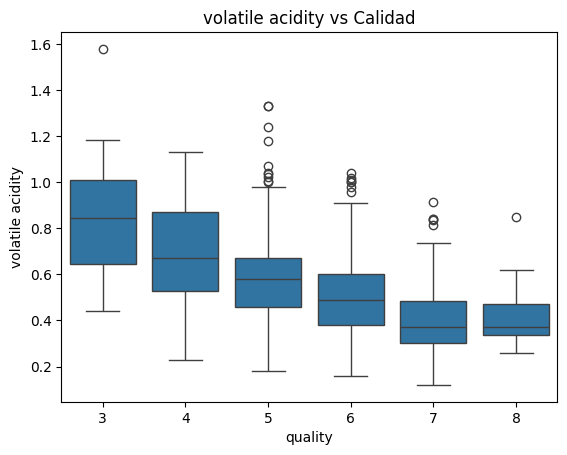

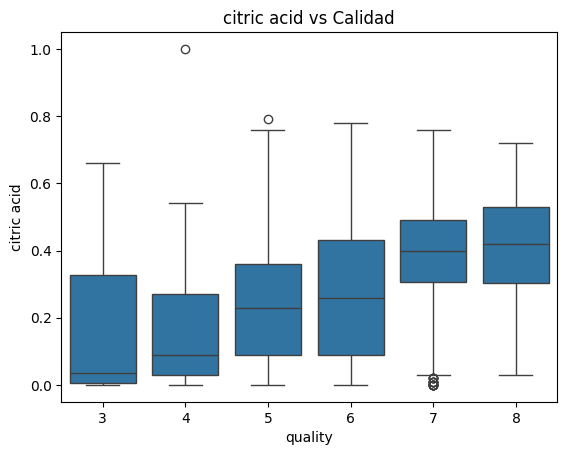

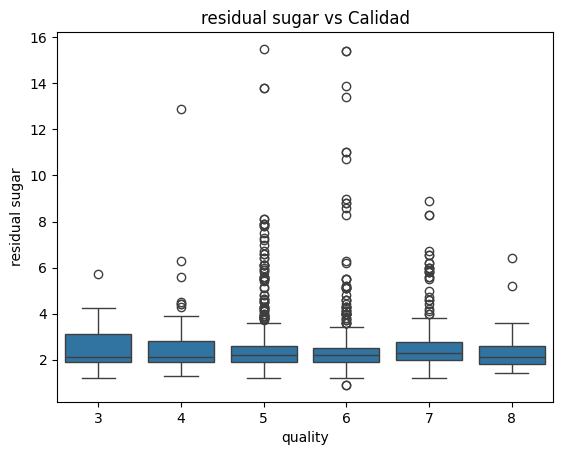

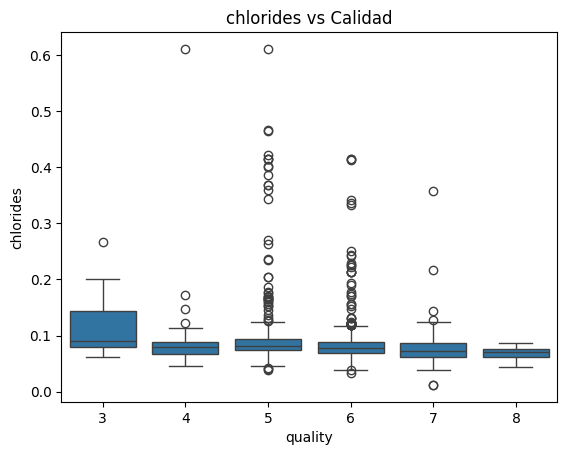

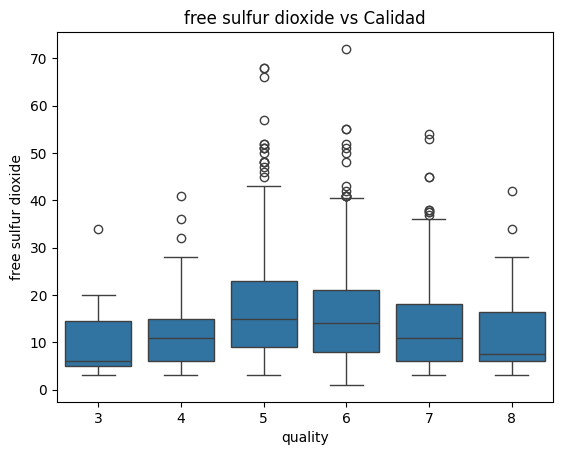

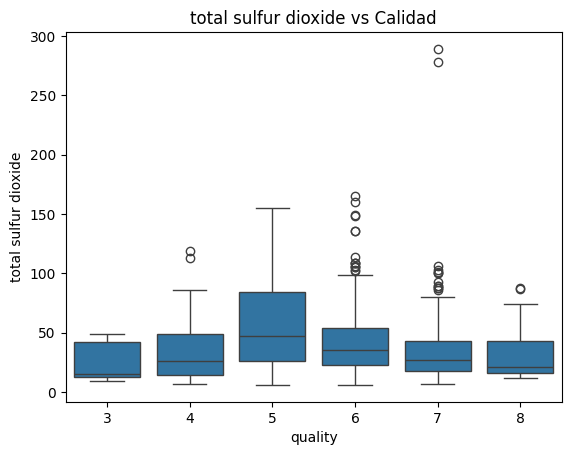

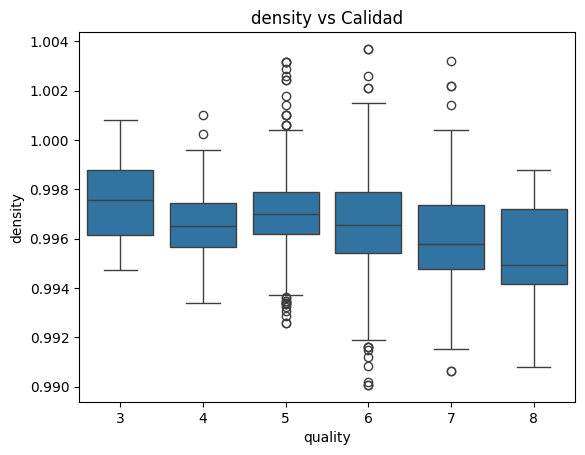

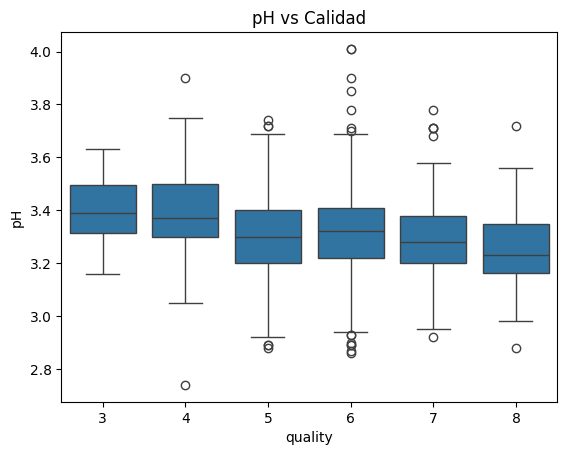

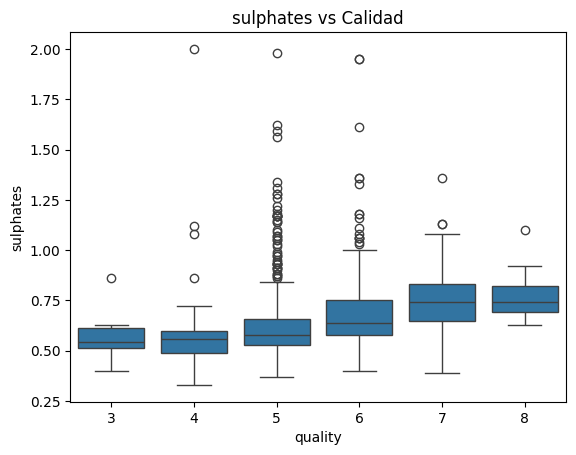

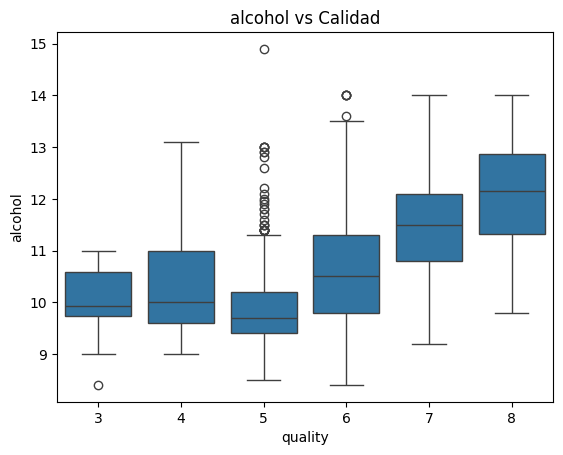

In [ ]:
# Comparación de variables con la calidad
for col in df.columns[:-1]:
  plt.figure()
  sns.boxplot(x='quality', y=col, data=df)
  plt.title(f'{col} vs Calidad')
  plt.show()


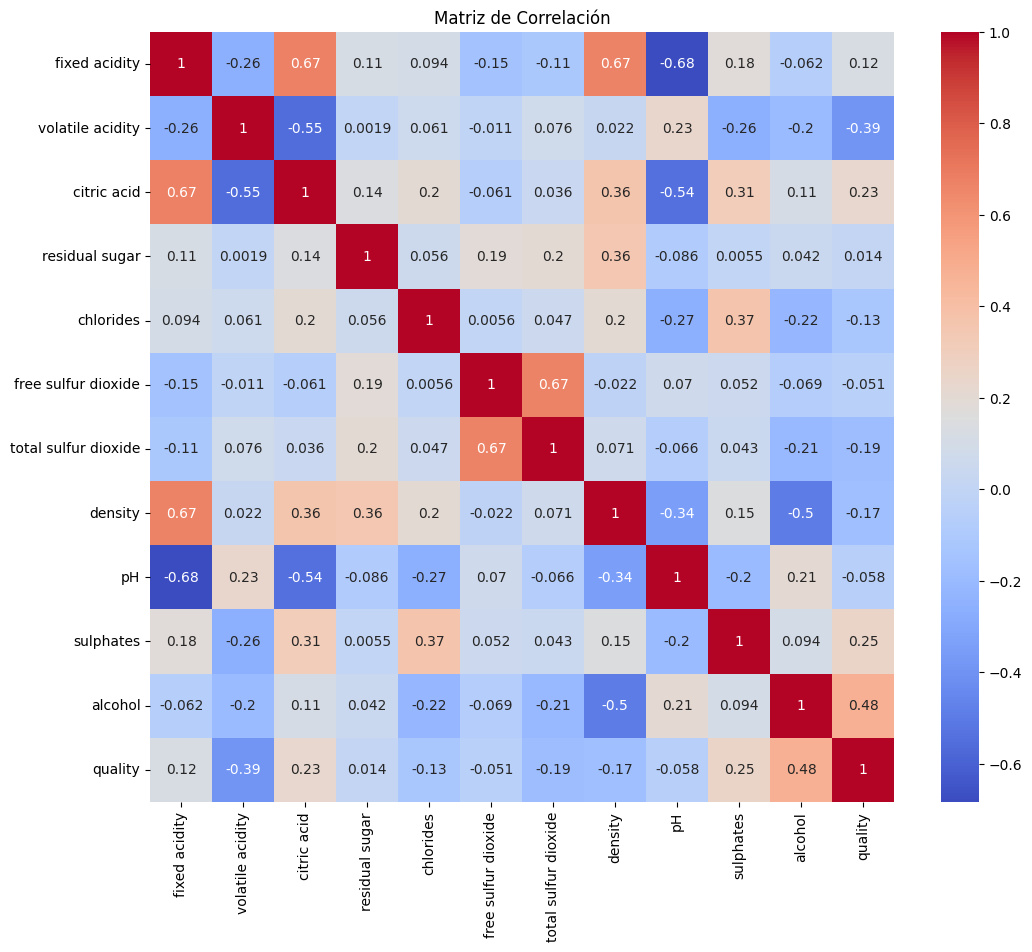

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
s

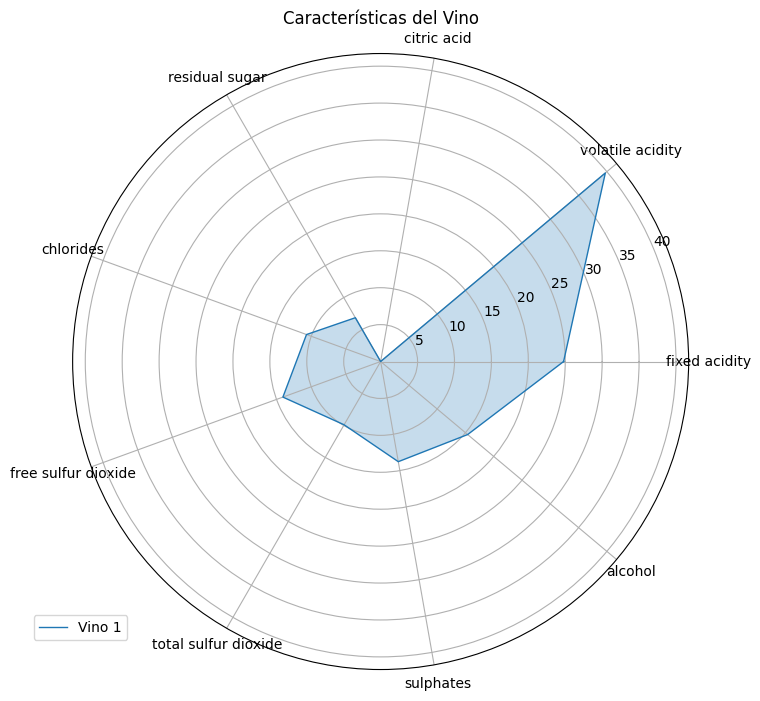

In [ ]:
pi = 3.141592653589793

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

df_norm = (df[features] - df[features].min()) / (df[features].max() - df[features].min())

# Número de variables
categories = list(df_norm.columns)
N = len(categories)

#Angulos del gráfico
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Gráfico
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Primer vino (se puede cambiar el índice para visualizar otros vinos)
values = df_norm.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Vino 1')
ax.fill(angles, values, alpha=0.25)

# Configuración las etiquetas de los ejes
ax.set_thetagrids(np.degrees(angles[:-1]), labels=categories)

# Leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Título
plt.title('Características del Vino')
plt.show()